# Steel temperature prediction for energy optimization

Key words: 
- Python
- Pandas
- Machine Learning
- Scikit-learn
- Boosting

In order to optimize production costs, the smelter (customer) decided to reduce electricity consumption. To do this, it is important for the customer to know what the temperature of the steel will be at the final stage of melting.
As part of this project, it is necessary to build a model that will predict the temperature of the steel in the end of given stage.

We were given a production data: about electrodes, bulk and wire addings (volumes and time), gas usage and temperature measurements. All those data came from the real steel production. 

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparation</a></span></li>
    <li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item">
        <li><span><a href="#Electrode-data" data-toc-modified-id="Electrode-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Electrode data</a></span></li>
        <li><span><a href="#Data-on-volumes-of-bulk-materials" data-toc-modified-id="Data-on-volumes-of-bulk-materials-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data on the volume of bulk materials</a></span></li>
        <li><span><a href="#Data-on-volumes-of-wire-materials" data-toc-modified-id="Data-on-volumes-of-wire-materials-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span> Data on volumes of wire materials</a></span></li>
        <li><span><a href="#Bulk-materials-feed-time-data" data-toc-modified-id="Bulk-materials-feed-time-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Bulk materials feed time data</a></span></li>
        <li><span><a href="#Wire-materials-feed-time-data" data-toc-modified-id="Wire-materials-feed-time-data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Wire materials feed time data</a></span></li>
        <li><span><a href="#Alloy-purge-data" data-toc-modified-id="Alloy-purge-data-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Alloy purge data</a></span></li>
        <li><span><a href="#Temperature-data" data-toc-modified-id="Temperature-data-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Temperature data</a></span></li>
    </ul><li><span><a href="#Training" data-toc-modified-id="Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item">
        <li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Decision Tree</a></span></li>
        <li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest</a></span></li>
        <li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Linear Regression</a></span></li>
        <li><span><a href="#Boosting" data-toc-modified-id="Boosting-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Boosting</a></span></li>
        </ul></li><li><span><a href="#Testing" data-toc-modified-id="Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing</a></span></li>
    <li><span><a href="#Visualization-of-results" data-toc-modified-id="Visualization-of-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualization of results</a></span></li>


## 1. Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

In [2]:
df_arc = pd.read_csv('C:\\Users\\Яна\\Documents\\Прогр\\dfs\\final_steel\\data_arc.csv')
df_bulk = pd.read_csv('C:\\Users\\Яна\\Documents\\Прогр\\dfs\\final_steel\\data_bulk.csv')
df_bulk_time = pd.read_csv('C:\\Users\\Яна\\Documents\\Прогр\\dfs\\final_steel\\data_bulk_time.csv')
df_gas = pd.read_csv('C:\\Users\\Яна\\Documents\\Прогр\\dfs\\final_steel\\data_gas.csv')
df_temp = pd.read_csv('C:\\Users\\Яна\\Documents\\Прогр\\dfs\\final_steel\\data_temp.csv')
df_wire = pd.read_csv('C:\\Users\\Яна\\Documents\\Прогр\\dfs\\final_steel\\data_wire.csv')
df_wire_time = pd.read_csv('C:\\Users\\Яна\\Documents\\Прогр\\dfs\\final_steel\\data_wire_time.csv')

There are datasets with a process information: 

- `data_arc.csv` — electrode data;
- `data_bulk.csv` — data on the supply of bulk materials (volume);
- `data_bulk_time.csv` — data on the supply of bulk materials (time);
- `data_gas.csv` — data on the gas purge of the alloy;
- `data_temp.csv` — temperature measurement results;
- `data_wire.csv` — data on wire materials (volume);
- `data_wire_time.csv` — wire material data (time).

## 2. Exploratory data analysis

### 2.1 Electrode data

In [3]:
display(df_arc.head())
df_arc.rename(columns = {'key': 'key', 'Начало нагрева дугой': 'heating_start_time', 
                         'Конец нагрева дугой': 'heating_finish_time', 'Активная мощность': 'active_power',
                        'Реактивная мощность': 'reactive_power'}, inplace = True)
print()
df_arc.info()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key                  14876 non-null  int64  
 1   heating_start_time   14876 non-null  object 
 2   heating_finish_time  14876 non-null  object 
 3   active_power         14876 non-null  float64
 4   reactive_power       14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


No missings. Need to change the type of columns with heating start and finish time to data type. And check outliers.

The column 'key' in all those datasets contains batch number.

In [4]:
df_arc['heating_start_time'] = pd.to_datetime(df_arc['heating_start_time'], format = '%Y-%m-%dT%H:%M:%S')
df_arc['heating_finish_time'] = pd.to_datetime(df_arc['heating_finish_time'], format = '%Y-%m-%dT%H:%M:%S')

count    14876.000000
mean         0.670441
std          0.408159
min          0.030002
25%          0.395297
50%          0.555517
75%          0.857034
max          3.731596
Name: active_power, dtype: float64

count    14876.000000
mean         0.452592
std          5.878702
min       -715.504924
25%          0.290991
50%          0.415962
75%          0.637371
max          2.676388
Name: reactive_power, dtype: float64


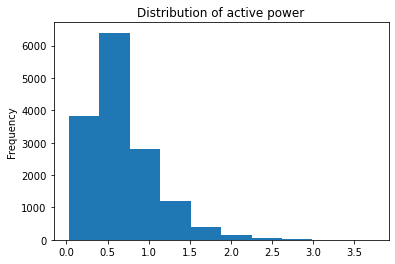

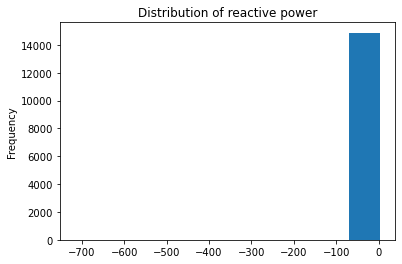

In [5]:
print(df_arc['active_power'].describe())
print()
print(df_arc['reactive_power'].describe())

df_arc['active_power'].plot(kind = 'hist', title = 'Distribution of active power')
plt.show()

df_arc['reactive_power'].plot(kind = 'hist', title = 'Distribution of reactive power')
plt.show()

In active power we have tail to 3.5, but it's comparable to median and the graph decreases quite smoothly, so I'll leave them in the table.

But the value of -715 with a median of -0.4 does not look plausible, and the distribution form is not supported. I'll take a closer look.

,key,heating_start_time,heating_finish_time,active_power,reactive_power
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


,key,heating_start_time,heating_finish_time,active_power,reactive_power
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


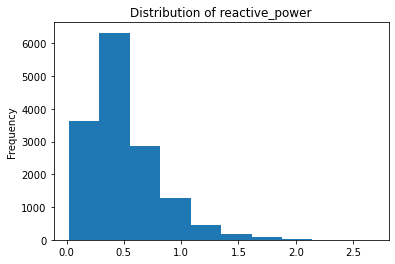

In [6]:
display(df_arc[df_arc['reactive_power'] < -100])
display(df_arc[df_arc['key'] == 2116])

df_arc = df_arc[df_arc['key'] != 2116]
df_arc['reactive_power'].plot(kind = 'hist', title = 'Distribution of reactive_power')
plt.show()

Except for one single value -715, other values are distributed as expected. It doesn't look like input error, so I'm guessing it's some kind of hardware problem. I'm removing this batch from the dataset.

Now the shape of the distribution looks believable.

### 2.2 Data on volumes of bulk materials

In [7]:
display(df_bulk.head())
print()
df_bulk.info()
print()
print('Number of batches in the table:', len(pd.unique(df_bulk['key'])))

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB

Number of batches in the table: 3129


It is logical to assume that all these NaNs are just zeros - the absence of this material in the indicated batch. So I replaced NaNs with zeros.

Some additives are more popular than others, but I don't consider this a reason to remove any data.

The number of batches in the table corresponds to the number of rows, so there is no need to group anything.

### 2.3 Data on volumes of wire materials

In [8]:
display(df_wire.head())
print()
df_wire.info()
print()
print('Number of batches in the table:', len(pd.unique(df_wire['key'])))

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB

Number of batches in the table: 3081


The same as for bulk materials, only data are given for fewer batches.

### Bulk materials feed time data 

In [9]:
display(df_bulk_time.head())
print()
df_bulk_time.info()
print()
print('Number of batches in the table:', len(pd.unique(df_bulk_time['key'])))

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB

Number of batches in the table: 3129


The size of the table over time corresponds to the size of the table with volumes, which is good. Time by itself means nothing. For each batch, we can calculate the intervals between adding different components. I don't see the point in taking into account all the intervals, but probably I'll use the time interval between the first and last additive as a feature.

### Wire materials feed time data

In [10]:
display(df_wire_time.head())
print()
df_wire_time.info()
print()
print('Number of batches in the table:', len(pd.unique(df_wire_time['key'])))

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB

Number of batches in the table: 3081


The same as with time for bulk materials. I don’t see much difference between them, so I plan to combine the tables with additives and calculate the time interval between the first and the last without taking into account the type of additive.

### Alloy purge data

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB

Number of batches in the table: 3239


,key,gas
116,117,50.581035
277,280,60.935689
319,322,77.995040
2105,2108,45.638999
2107,2110,52.142373
2567,2570,51.380229


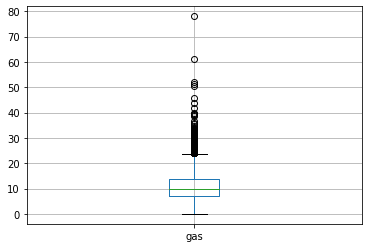

In [11]:
display(df_gas.head())
df_gas.rename(columns = {'key': 'key', 'Газ 1': 'gas'}, inplace = True)
print()
df_gas.info()
print()
print('Number of batches in the table:', len(pd.unique(df_gas['key'])))
df_gas.boxplot(column = ['gas'])
display(df_gas[df_gas['gas'] >45])

No missings, Dtypes are as expected, one line per batch. Perfect.

There are two outliers, but this is real data from production, and anything can happen in production. These gas values look realistic, so I leave them in the table.

### Temperature data

In [12]:
display(df_temp.head())
df_temp.rename(columns = {'key': 'key', 'Время замера': 'check_time', 'Температура': 'temperature'}, inplace = True)
print()
df_temp.info()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          15907 non-null  int64  
 1   check_time   15907 non-null  object 
 2   temperature  13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


The date will need to be converted to a date format.

In a column with a temperature of 3000 passes. That's a lot, I'll take a closer look at them.

In [13]:
display(df_temp[df_temp['temperature'].isna()])

display(df_temp[df_temp['key'] == 2500])
display(df_temp[df_temp['key'] == 2501])
display(df_temp[df_temp['key'] == 2502])

,key,check_time,temperature
12268,2500,2019-08-06 03:24:43,NaN
12269,2500,2019-08-06 03:25:16,NaN
12270,2500,2019-08-06 03:28:21,NaN
12272,2501,2019-08-06 04:01:59,NaN
12273,2501,2019-08-06 04:14:35,NaN
...,...,...,...
15901,3240,2019-09-01 03:35:16,NaN
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN


,key,check_time,temperature
12267,2500,2019-08-06 03:11:31,1539.0
12268,2500,2019-08-06 03:24:43,NaN
12269,2500,2019-08-06 03:25:16,NaN
12270,2500,2019-08-06 03:28:21,NaN


,key,check_time,temperature
12271,2501,2019-08-06 03:44:42,1587.0
12272,2501,2019-08-06 04:01:59,NaN
12273,2501,2019-08-06 04:14:35,NaN
12274,2501,2019-08-06 04:22:14,NaN
12275,2501,2019-08-06 04:31:14,NaN


,key,check_time,temperature
12276,2502,2019-08-06 04:45:26,1583.0
12277,2502,2019-08-06 04:46:04,NaN
12278,2502,2019-08-06 04:52:32,NaN
12279,2502,2019-08-06 04:57:30,NaN
12280,2502,2019-08-06 05:04:16,NaN
12281,2502,2019-08-06 05:11:38,NaN
12282,2502,2019-08-06 05:12:20,NaN


I look at the full data on the stages at which there are missings. On all that stages is only the first temperature measurement, which makes information about these stages useless, as there is no target feature (final temperature measurement).

I'll delete those steps later.

## Preparing Data for Model Training.

### Electrode Data

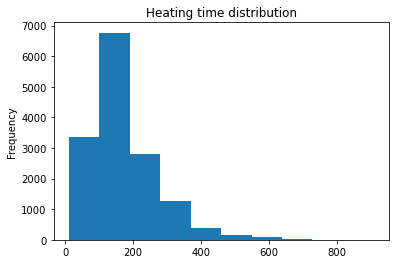

In [14]:
df_arc['heat_time'] = df_arc['heating_finish_time'] - df_arc['heating_start_time']
df_arc['heat_time'] = df_arc['heat_time'].dt.total_seconds()

df_arc = df_arc.drop(['heating_start_time', 'heating_finish_time'], axis = 1)

df_arc['heat_time'].plot(kind = 'hist', title = 'Heating time distribution')
plt.show()

In [15]:
df_arc = df_arc.groupby(by = 'key').sum()
display(df_arc.head())

,active_power,reactive_power,heat_time
key,,,
1,4.878147,3.183241,1098.0
2,3.052598,1.998112,811.0
3,2.525882,1.599076,655.0
4,3.209250,2.060298,741.0
5,3.347173,2.252643,869.0


I think the duration of heating is better for training the model than the start and end times. So I create the corresponding column. To check for outliers, I build a histogram - there are no negative values, improbably long tails too. The data looks belevable.

I delete unnecessary columns with dates, summarize the remaining ones by batch number - and get a beautiful table with batch indicators is obtained, as in all other datasets.

### Gas

In [16]:
df_gas = df_gas.set_index('key')

This data does not need to be converted, it's necessary only to prepare the dataframe for merging: set the batch number as an index.

### Number of additives

In [17]:
df_bulk['n_bulk'] = 15 - (df_bulk.isnull().sum(axis=1))
df_bulk = df_bulk.fillna(0)
df_bulk = df_bulk.set_index('key')
display(df_bulk.head())

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,n_bulk
key,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,4
2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,4
3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,4
4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,4
5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,4


In [18]:
df_wire['n_wire'] = 9 - (df_wire.isnull().sum(axis=1))
df_wire = df_wire.fillna(0)
df_wire = df_wire.set_index('key')
display(df_wire.head())

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,n_wire
key,,,,,,,,,,
1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


I add columns with the total amount (not the total mass) of wire and bulk additives to the features. And replace NaNs with zeros.

I'll not delete the columns for each individual additive, they make sense from the physics point of view.

### Temperature

In [19]:
drop_batch_ci = df_temp[df_temp['temperature'] < 1450]['key'].unique()
drop_list_ci = drop_batch_ci.tolist()

print(drop_list_ci)

[867, 1214, 1619, 1818, 2052, 2561]


From technical documentation on steelmaking processes, we know that everything that melts at a temperature of less than 1500 degrees is cast iron. There are very few of them, so it makes no sense to create a separate category. I saved the numbers of these parties in a separate list and going to remove them from the dataset.

In [20]:
df_temp['cat'] = df_temp.key.diff(periods=-1).eq(0)
df_target_temp = df_temp[df_temp['cat'] == False]

drop_batch_nan = df_target_temp[df_target_temp['temperature'].isna()]['key'].unique()
drop_list_nan = drop_batch_nan.tolist()

print(len(drop_list_nan))

739


The second stage of selection is to select batches that don't have a target value (final temperature measurement after adding all additives). To do this, I create a dataset consisting only of the latest temperature measurements for each batch, and save in a separate list those batches for which the last measurement does not have data - there were 739 such batches. Later I'll delete these batches from the final dataset.

In [21]:
df_temp['check_time'] = pd.to_datetime(df_temp['check_time'], format = '%Y-%m-%dT%H:%M:%S')

df_t_temp = df_temp.pivot_table(index='key', values='temperature', aggfunc=['first','last'])
df_t_temp.columns = ['first_temp', 'last_temp']
display(df_t_temp.head())

,first_temp,last_temp
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0


Using the pivot table, I get a couple more features - the first and last measured temperature for each batch.

In [22]:
df_temp_time = df_temp.pivot_table(index='key', values='check_time', aggfunc=['first','last','count'])
df_temp_time.columns = ['time_first_temp', 'time_last_temp', 'n_check']
df_temp_time[['time_first_temp', 'time_last_temp']] = df_temp_time[['time_first_temp',
                                                                'time_last_temp']]
df_temp_time['heating_interval'] = (df_temp_time['time_last_temp'] -
                               df_temp_time['time_first_temp']).dt.total_seconds()

display(df_temp_time)

,time_first_temp,time_last_temp,n_check,heating_interval
key,,,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39,5,861.0
2,2019-05-03 11:37:27,2019-05-03 11:59:12,6,1305.0
3,2019-05-03 12:13:17,2019-05-03 12:34:57,5,1300.0
4,2019-05-03 12:52:57,2019-05-03 12:59:25,3,388.0
5,2019-05-03 13:23:19,2019-05-03 13:36:01,2,762.0
...,...,...,...,...
3237,2019-08-31 22:44:04,2019-08-31 23:05:43,5,1299.0
3238,2019-08-31 23:30:31,2019-08-31 23:43:00,3,749.0
3239,2019-09-01 01:31:47,2019-09-01 02:24:15,8,3148.0


Another pivot table. The number of measurements and the heating time will become features, and the time of the first and last measurement will still be useful in the next step.

### Mapping time markers

The target feature in this project is the final temperature measurement of each batch. Therefore, it is necessary to exclude from the table those batches in which, after the last measurement, there were some other actions. Obviously in these parties the last known temperature is not the final one.

In [23]:
cols_bulk = (['Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 
              'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15'])
df_bulk_time[cols_bulk] = df_bulk_time[cols_bulk].apply(pd.to_datetime) 

cols_wire = ['Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9']
df_wire_time[cols_wire] = df_wire_time[cols_wire].apply(pd.to_datetime) 

df_additive_time = df_bulk_time.merge(df_wire_time, on = 'key', how = 'outer')
df_additive_time = df_additive_time.set_index('key')

Changing the Dtype in tables with the time of adding bulks and wire to the datetime type and combine the tables. And set the batch number as an  index.

In [24]:
df_time = df_additive_time.join(df_temp_time, how = 'outer')
df_time = df_time.drop(['n_check', 'heating_interval'], axis = 1)

I add to the table with the time of adding additives information about the time of the first and last temperature measurement for this batch.

In [25]:
df_time['max_time'] = df_time.max(axis=1)
drop_list_time = df_time.index[df_time['time_last_temp'] != df_time['max_time']].tolist()

display(drop_list_time)

[586, 1244, 1316, 1493, 1505, 1549, 1873, 2137, 2421, 2667]

Received a list of parties in which temperature measurement is not the last action. They also need to be removed from the final df.

In [26]:
df_temp_time = df_temp_time.drop(['time_first_temp', 'time_last_temp'], axis = 1)

Now we can remove from this dataframe the columns that is not needed for the final table.

### Assembly of the final dataframe

In [27]:
frames = [df_t_temp, df_arc, df_bulk, df_wire, df_gas, df_temp_time]
df = df_t_temp.join(df_arc, how = 'inner')
df = df.join(df_bulk, how = 'inner')
df = df.join(df_wire, how = 'inner')
df = df.join(df_gas, how = 'inner')
df = df.join(df_temp_time, how = 'inner')

display(df.head())
df.shape

,first_temp,last_temp,active_power,reactive_power,heat_time,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,...,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,n_wire,gas,n_check,heating_interval
key,,,,,,,,,,,,,,,,,,,,,
1,1571.0,1613.0,4.878147,3.183241,1098.0,0.0,0.0,0.0,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,29.749986,5,861.0
2,1581.0,1602.0,3.052598,1.998112,811.0,0.0,0.0,0.0,73.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,12.555561,6,1305.0
3,1596.0,1599.0,2.525882,1.599076,655.0,0.0,0.0,0.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,28.554793,5,1300.0
4,1601.0,1625.0,3.209250,2.060298,741.0,0.0,0.0,0.0,81.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,18.841219,3,388.0
5,1576.0,1602.0,3.347173,2.252643,869.0,0.0,0.0,0.0,78.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,5.413692,2,762.0


(3021, 34)

I'm assembling the table using the inner join based on the df_t_temp dataframe. So I will definitely get data only for those batches for which there is a target feature.

In [28]:
drop_list = drop_list_ci + drop_list_nan + drop_list_time
print(len(drop_list))

drop_list = list(set(drop_list))
print(len(drop_list))

755
753


Now I am collecting the final list of batches for which data should be excluded. I see that none of the filtering steps was superfluous, there are only two duplicate values in the final list for deletion. In total, data on 753 batches will have to be deleted.

In [29]:
df = df[~df.index.isin(drop_list)]

df.shape

(2315, 34)

I delete information about inappropriate parties. There are 2315 lines left for training - not many, but acceptable.

Now the columns.

In [30]:
df.corr()

,first_temp,last_temp,active_power,reactive_power,heat_time,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,...,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,n_wire,gas,n_check,heating_interval
first_temp,1.000000,0.299174,-0.433186,-0.406911,-0.382916,0.079397,0.141996,-0.111324,0.166378,0.078992,...,0.076371,NaN,0.020815,0.052980,-0.029911,0.002662,-0.058110,0.040233,0.196540,0.212671
last_temp,0.299174,1.000000,0.293121,0.243179,0.281356,-0.075577,-0.082754,-0.035338,0.189130,-0.028495,...,-0.160267,NaN,-0.084355,-0.137722,-0.010830,-0.027614,-0.203053,0.061773,0.098800,0.099408
active_power,-0.433186,0.293121,1.000000,0.958292,0.978102,0.084025,0.030959,0.110418,-0.030896,0.006165,...,0.047596,NaN,0.053167,0.019617,0.029369,-0.016504,0.034311,0.371539,0.351465,0.536904
reactive_power,-0.406911,0.243179,0.958292,1.000000,0.965388,0.108471,0.051945,0.067144,-0.032520,0.018682,...,0.075723,NaN,0.055052,0.036919,0.016432,-0.012438,0.032220,0.354837,0.359600,0.538477
heat_time,-0.382916,0.281356,0.978102,0.965388,1.000000,0.102669,0.038144,0.090247,-0.027930,0.013257,...,0.054814,NaN,0.042134,0.027630,0.017750,-0.011861,0.029084,0.394531,0.389551,0.564339
Bulk 1,0.079397,-0.075577,0.084025,0.108471,0.102669,1.000000,0.224632,-0.011561,0.041686,0.060249,...,0.146229,NaN,0.148413,0.083411,-0.019658,0.010916,0.031655,0.234025,0.116131,0.149969
Bulk 2,0.141996,-0.082754,0.030959,0.051945,0.038144,0.224632,1.000000,-0.047016,0.040797,0.360270,...,0.699334,NaN,0.558869,0.431732,-0.005305,-0.006884,0.283948,0.217688,0.152547,0.250505
Bulk 3,-0.111324,-0.035338,0.110418,0.067144,0.090247,-0.011561,-0.047016,1.000000,-0.295012,-0.006778,...,-0.040637,NaN,0.007181,-0.019501,0.004890,0.004672,0.054606,0.058237,0.022329,0.025173
Bulk 4,0.166378,0.189130,-0.030896,-0.032520,-0.027930,0.041686,0.040797,-0.295012,1.000000,0.028294,...,0.034424,NaN,-0.011535,0.033859,0.007782,-0.058319,-0.220612,0.018240,0.011425,0.000932
Bulk 5,0.078992,-0.028495,0.006165,0.018682,0.013257,0.060249,0.360270,-0.006778,0.028294,1.000000,...,0.262731,NaN,0.204755,0.172126,-0.008388,-0.010883,0.081999,0.086806,0.081632,0.098642


As we know, if the correlation between features is greater than 95%, then it is better to remove one of them in order to prevent retraining of the model. To check the presence of redundant features, I build a correlation matrix. The first thing that catches your eye is NaNs on the fifth wire.

In [31]:
display(df['Wire 5'].unique())

array([0.])

I check the values of this attribute: initially there was only one batch in the table, into which the fifth wire was poured, and it was eliminated during the data cleaning process. So I'll just remove that column from the final df.

In [32]:
df = df.drop('Wire 5', axis = 1)
corr = df.corr()
display(corr)

,first_temp,last_temp,active_power,reactive_power,heat_time,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,...,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9,n_wire,gas,n_check,heating_interval
first_temp,1.000000,0.299174,-0.433186,-0.406911,-0.382916,0.079397,0.141996,-0.111324,0.166378,0.078992,...,-0.003395,0.076371,0.020815,0.052980,-0.029911,0.002662,-0.058110,0.040233,0.196540,0.212671
last_temp,0.299174,1.000000,0.293121,0.243179,0.281356,-0.075577,-0.082754,-0.035338,0.189130,-0.028495,...,-0.047739,-0.160267,-0.084355,-0.137722,-0.010830,-0.027614,-0.203053,0.061773,0.098800,0.099408
active_power,-0.433186,0.293121,1.000000,0.958292,0.978102,0.084025,0.030959,0.110418,-0.030896,0.006165,...,0.035393,0.047596,0.053167,0.019617,0.029369,-0.016504,0.034311,0.371539,0.351465,0.536904
reactive_power,-0.406911,0.243179,0.958292,1.000000,0.965388,0.108471,0.051945,0.067144,-0.032520,0.018682,...,0.030496,0.075723,0.055052,0.036919,0.016432,-0.012438,0.032220,0.354837,0.359600,0.538477
heat_time,-0.382916,0.281356,0.978102,0.965388,1.000000,0.102669,0.038144,0.090247,-0.027930,0.013257,...,0.033208,0.054814,0.042134,0.027630,0.017750,-0.011861,0.029084,0.394531,0.389551,0.564339
Bulk 1,0.079397,-0.075577,0.084025,0.108471,0.102669,1.000000,0.224632,-0.011561,0.041686,0.060249,...,0.020083,0.146229,0.148413,0.083411,-0.019658,0.010916,0.031655,0.234025,0.116131,0.149969
Bulk 2,0.141996,-0.082754,0.030959,0.051945,0.038144,0.224632,1.000000,-0.047016,0.040797,0.360270,...,0.223163,0.699334,0.558869,0.431732,-0.005305,-0.006884,0.283948,0.217688,0.152547,0.250505
Bulk 3,-0.111324,-0.035338,0.110418,0.067144,0.090247,-0.011561,-0.047016,1.000000,-0.295012,-0.006778,...,0.005845,-0.040637,0.007181,-0.019501,0.004890,0.004672,0.054606,0.058237,0.022329,0.025173
Bulk 4,0.166378,0.189130,-0.030896,-0.032520,-0.027930,0.041686,0.040797,-0.295012,1.000000,0.028294,...,-0.039389,0.034424,-0.011535,0.033859,0.007782,-0.058319,-0.220612,0.018240,0.011425,0.000932
Bulk 5,0.078992,-0.028495,0.006165,0.018682,0.013257,0.060249,0.360270,-0.006778,0.028294,1.000000,...,0.070839,0.262731,0.204755,0.172126,-0.008388,-0.010883,0.081999,0.086806,0.081632,0.098642


In [33]:
high_corr = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
high_corr = high_corr.stack()
display(high_corr[high_corr > 0.9])

active_power    reactive_power    0.958292
                heat_time         0.978102
reactive_power  heat_time         0.965388
Bulk 9          Wire 8            0.974968
dtype: float64

To save my eyes, I select a matrix with high correlations only. To do this, I cut off the duplicated area of the correlation matrix, excluding the diagonal with ones as well. Then use the stack function to get pairs of correlated metrics.

We see:
- active power excessively correlates with reactive power and heating time;
- reactive power also with heating time;
- unexpectedly bulk 9 with wire 8, that's where I would not look for correlations myself.

I delete columns with reactive power, heating time and the eighth wire.

In [34]:
df = df.drop(['reactive_power', 'heat_time', 'Wire 8'], axis = 1)
df.shape

(2315, 30)

2315 rows, 30 columns. The data for training models is ready.

## Models training

In [35]:
features = df.drop('last_temp', axis=1)
target = df['last_temp']

features_train, features_valid, target_train, target_valid = (
    train_test_split(features, target, test_size=0.2, random_state=12345))

print(features_train.shape)
print(target_train.shape)
print()
print(features_valid.shape)
print(target_valid.shape)

(1852, 29)
(1852,)

(463, 29)
(463,)


In [36]:
scaler = StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

I divide the sample into training and validation. Scale the features so they all have the same weight for models.

### Linear Regression

In [37]:
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)
predictions_LR = model_LR.predict(features_valid)

In [38]:
MAE_LR = mean_absolute_error(target_valid, predictions_LR)
print(MAE_LR)

5.756402496068201


And simple linear regression gave me a MAE of 5.69 on the first try (The minimum allowed value was MAE ≤ 8.7). Not in vain I combed out the data.

### Random Forest

In [39]:
%%time

params = {'n_estimators': range(20, 81, 5),
          'max_depth': range(2, 6),
         'min_samples_leaf': range(2, 10)}

model_RFR = RandomForestRegressor(random_state = 12345)

grid = GridSearchCV(model_RFR, params, cv = 5, n_jobs = -1)

grid.fit(features_train, target_train)

grid.best_params_

CPU times: total: 8.02 s
Wall time: 43.8 s


{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 30}

In [40]:
model_RFR = RandomForestRegressor(n_estimators = 30,
        max_depth = 5, 
        min_samples_leaf = 2,
        random_state = 12345)

model_RFR.fit(features_train, target_train)
predictions_RFR = model_RFR.predict(features_valid)

MAE_RFR = mean_absolute_error(target_valid, predictions_RFR)
print(MAE_RFR)

6.202064538959304


Finding out the optimal parameters for the forest and train the forest with them. Worse than regression, but still good enough.

### Gradient boosting

In [41]:
%%time
model_LGBM = lgb.LGBMRegressor(random_state = 12345)

lgbm_params = {'n_estimators': range(40, 101, 5), 'max_depth': range(4, 15)}

grid_lgbm = GridSearchCV(estimator = model_LGBM, param_grid = lgbm_params, n_jobs = -1, cv = 6)

grid_lgbm.fit(features_train, target_train)

print(grid_lgbm.best_params_)

{'max_depth': 9, 'n_estimators': 85}
CPU times: total: 3.5 s
Wall time: 9.37 s


In [42]:
model_LGBM = lgb.LGBMRegressor(n_estimators = 85, 
               max_depth = 9, random_state = 12345)

model_LGBM.fit(features_train, target_train)
predictions_LGBM = model_LGBM.predict(features_valid)

MAE_LGBM = mean_absolute_error(target_valid, predictions_LGBM)
print(MAE_LGBM)

5.543127648650065


Gradient boosting gives the best result. Although in absolute terms not much better than linear regression.

## Analysis of factors significance

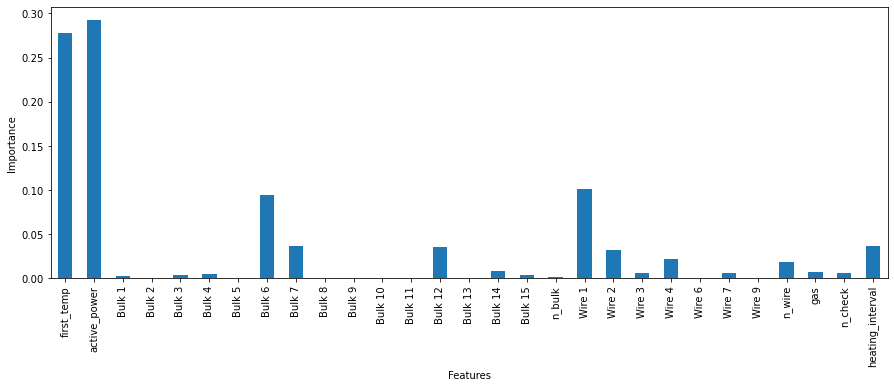

In [43]:
feature_names = features.columns

i_RFR = model_RFR.feature_importances_
RFR_importances = pd.Series(i_RFR, index=feature_names)

RFR_importances.plot(kind = 'bar', figsize = (15, 5), xlabel = 'Features', ylabel = 'Importance')
plt.show()

For the random forest, the factors are strongly unequal. I don’t know what significance threshold is usually used for dropout, but even if remove only zeros, we can safely drop nine factors. This is a third part of the table.

The input temperature and active power turned out to be the most important for the prediction, which is quite expected.

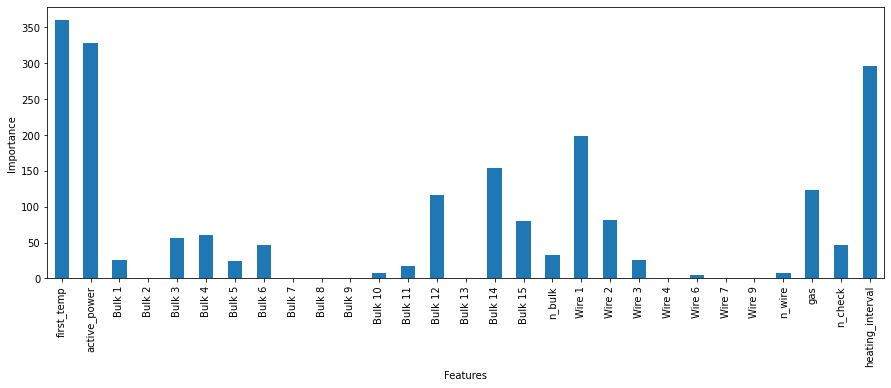

In [44]:
i_LGBM = model_LGBM.feature_importances_
LGBM_importances = pd.Series(i_LGBM, index=feature_names)

LGBM_importances.plot(kind = 'bar', figsize = (15, 5), xlabel = 'Features', ylabel = 'Importance')
plt.show()

For gradient boosting predictions we can even say that there are not two, but three leaders: the heating time is added to the initial temperature and active power. But by zeros, we can still remove 8 factors, and the useless factors for the two models are mostly the same.

## Conclusions

Judging by the fact that the most important factor for predicting the target temperature is the initial temperature, the energy saving problem should be solved mainly at the previous stage, from where we get the input alloy. We also need to control the active power and heating time (which is obvious), and the supply of some additives (6 and 12 bulks and 1 and 2 wires).

Bulks 2, 8, 9, 13 and wire 9 can be safely excluded from the features, they are not significant for any model.

Gradient boosting did the best (MAE 5.5). Linear regression (5.7) also did quite well. Considering the small difference in prediction accuracy and the large difference in the computational resources needed to run the model, in real conditions, I would recommend the plant management start by scaling the regression and testing its results on a larger sample. And only if its results at the same time greatly deteriorate, proceed to the use of GB.